In [1]:
import cv2
import numpy as np
import PIL
import io
import html
import time
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
from matplotlib import pyplot as plt

In [2]:
uda.ge!git clone https://github.com/ultralytics/yolov5 # clone repo
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.ct_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15529, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 15529 (delta 47), reused 18 (delta 2), pack-reused 15393
Receiving objects: 100% (15529/15529), 14.52 MiB | 24.14 MiB/s, done.
Resolving deltas: 100% (10576/10576), done.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Setup complete. Using torch 2.0.0+cu118 (Tesla T4)


In [3]:
!unzip "/content/drive/MyDrive/data.zip"

Archive:  /content/drive/MyDrive/data.zip
  inflating: data.yaml               
  inflating: test/images/1003.png    
  inflating: test/images/1014.png    
  inflating: test/images/1015.png    
  inflating: test/images/1020.png    
  inflating: test/images/1021.png    
  inflating: test/images/1023.png    
  inflating: test/images/1026.png    
  inflating: test/images/1027.png    
  inflating: test/images/1028.png    
  inflating: test/images/1029.png    
  inflating: test/images/1032.png    
  inflating: test/images/1034.png    
  inflating: test/images/1040.png    
  inflating: test/images/1043.png    
  inflating: test/images/1045.png    
  inflating: test/images/1047.png    
  inflating: test/images/1048.png    
  inflating: test/images/1052.png    
  inflating: test/images/1054.png    
  inflating: test/images/1055.png    
  inflating: test/images/1058.png    
  inflating: test/images/1065.png    
  inflating: test/images/1069.png    
  inflating: test/images/1071.png    
  inflat

In [4]:
import shutil
for src in ['train', 'test', 'valid']:
    os.makedirs(f"/content/data/{src}/images/", exist_ok=True)
    os.makedirs(f"/content/data/{src}/labels/", exist_ok=True)
    files = os.listdir(f"/content/{src}/images")
    for f in files:
        shutil.copy(f"/content/{src}/images/{f}", f"/content/data/{src}/images/{f}")
        
    files = os.listdir(f"/content/{src}/labels")
    for f in files:
        shutil.copy(f"/content/{src}/labels/{f}", f"/content/data/{src}/labels/{f}")

In [5]:
!python "yolov5/train.py" --img 416 --batch 16 --epochs 4 --data "/content/data.yaml" --weights yolov5x.pt --cache

requirements: YOLOv5 requirement "gitpython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.8 MB/s eta 0:00:00

requirements: 1 package updated per ['gitpython']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

train: weights=yolov5x.pt, cfg=, data=/content/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=4, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1,

In [6]:
!python "yolov5/val.py" --task test --weights yolov5/runs/train/exp/weights/best.pt --data /content/data.yaml

val: data=/content/data.yaml, weights=['yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 322 layers, 86233975 parameters, 0 gradients
test: Scanning /content/data/test/labels... 104 images, 3 backgrounds, 0 corrupt: 100% 107/107 [00:00<00:00, 278.42it/s]
test: New cache created: /content/data/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 4/4 [00:11<00:00,  2.92s/it]
                   all        107        550      0.639       0.25      0.288      0.143
    

In [7]:
!python "yolov5/detect.py" --weights yolov5x.pt --data 0523b641cddd9cbb.jpg

detect: weights=['yolov5x.pt'], source=yolov5/data/images, data=0523b641cddd9cbb.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 85.0ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 3 persons, 2 ties, 99.3ms
Speed: 0.5ms pre-process, 92.2ms inference, 62.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp


In [8]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp/weights/best.pt', force_reload=True)

/usr/local/lib/python3.9/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-4-15 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)



requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


Fusing layers... 
Model summary: 322 layers, 86233975 parameters, 0 gradients
Adding AutoShape... 


In [9]:
##model = torch.hub.load('ultralytics/yolov5', 'yolov5x')

In [10]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 80, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(160, 80, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(160, 80, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(160, 160, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(80, 80, kernel_size=(1, 1), stride=(1, 1

In [11]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


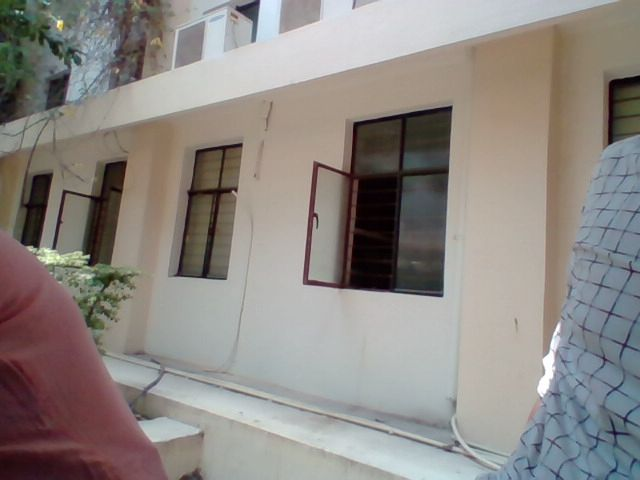

In [16]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [17]:
img = "/content/photo.jpg"

In [18]:
results = model(img)
results.print()

image 1/1: 480x640 2 doors
Speed: 8.7ms pre-process, 68.1ms inference, 3.7ms NMS per image at shape (1, 3, 480, 640)


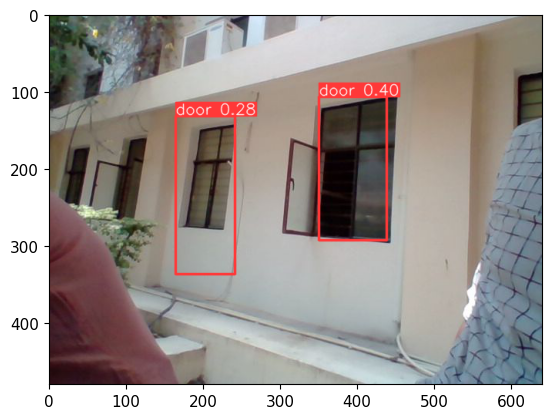

In [19]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()